<a href="https://colab.research.google.com/github/miller00315/estatistica_machine_learning/blob/master/visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficos

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Base da dados

In [3]:
dataset = pd.read_csv('census.csv')
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Gráfico disperção

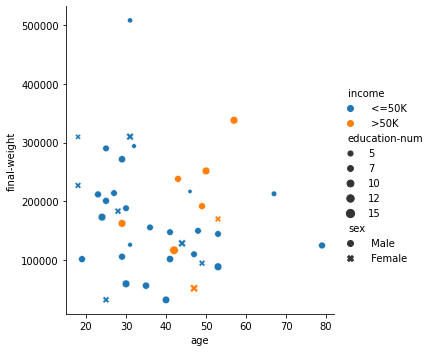

In [11]:
sns.relplot(x = 'age', y = 'final-weight', data=dataset.iloc[40:80,0:],
            hue = 'income', style = 'sex', size = 'education-num');

Gráfico de barra

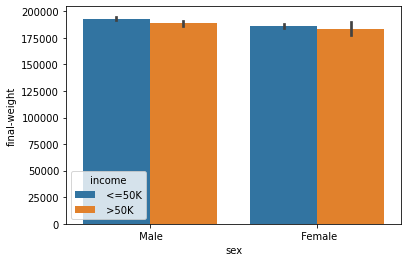

In [13]:
sns.barplot(x="sex", y="final-weight", data=dataset, hue="income")

Grafico de pizza

In [15]:
dados_agrupados = dataset.groupby(['income'])['education-num'].sum()
dados_agrupados

income
 <=50K    237190
 >50K      91047
Name: education-num, dtype: int64

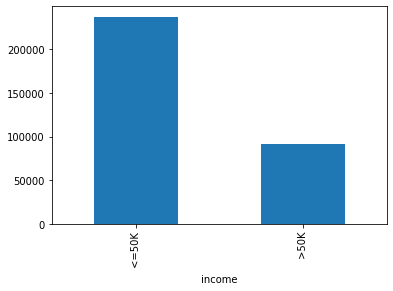

In [16]:
dados_agrupados.plot.bar();

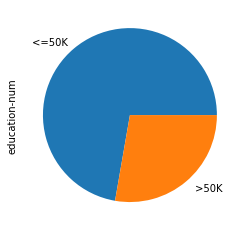

In [18]:
dados_agrupados.plot.pie();

Gráfico de linha

In [19]:
vendas = {'mes': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
          'valor': np.array([100, 200, 120, 300, 500, 198, 200, 209, 130, 500, 300, 120])}

In [20]:
vendas_df = pd.DataFrame(vendas)
vendas_df

,mes,valor
0,1,100
1,2,200
2,3,120
3,4,300
4,5,500
5,6,198
6,7,200
7,8,209
8,9,130
9,10,500


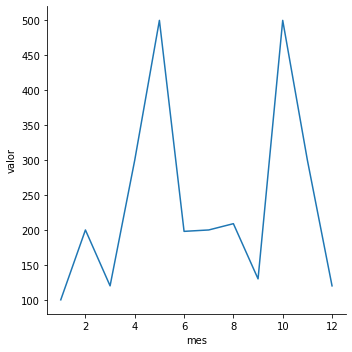

In [21]:
sns.relplot(x = 'mes', y = 'valor', kind = 'line', data=vendas_df);

In [31]:
np.array(dataset['education-num'])

array([13, 13,  9, ...,  9,  9,  9])

In [32]:
np.array(dataset['final-weight'])

array([ 77516,  83311, 215646, ..., 151910, 201490, 287927])

In [45]:
cs_df = dataset.iloc[:, [2, 4]]

cs_df

,final-weight,education-num
0,77516,13
1,83311,13
2,215646,9
3,234721,7
4,338409,13
...,...,...
32556,257302,12
32557,154374,9
32558,151910,9
32559,201490,9


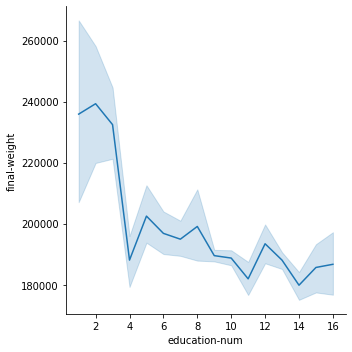

In [46]:
sns.relplot(x = 'education-num', y = 'final-weight', kind = 'line', data=cs_df);

Box plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


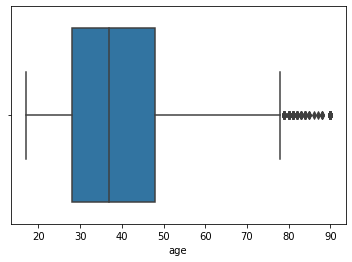

In [39]:
sns.boxplot(dataset['age']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


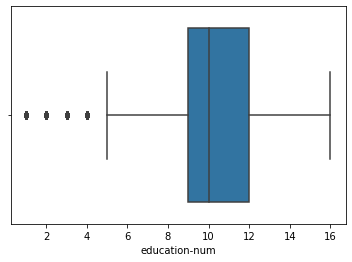

In [41]:
sns.boxplot(dataset['education-num']);

In [44]:
dataset2 = dataset.iloc[:, [0, 4, 12]]

dataset2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


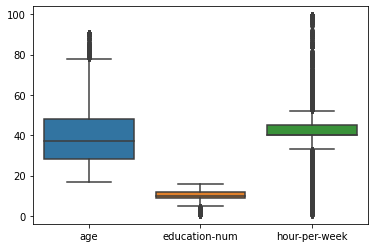

In [48]:
sns.boxplot(data=dataset2)

# Gráficos com atributos categóricos

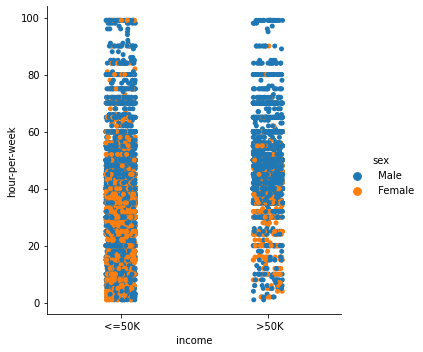

In [49]:
sns.catplot(x = 'income', y = 'hour-per-week', data=dataset, hue = 'sex');

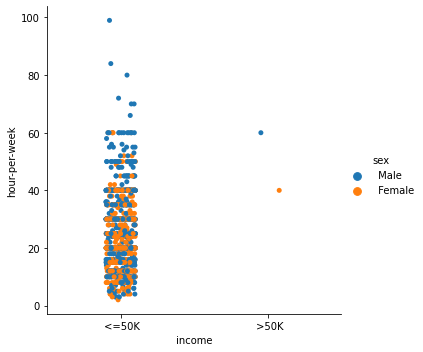

In [56]:
sns.catplot(x = 'income', y = 'hour-per-week', 
            data=dataset.query('age < 20'), hue = 'sex');

# Gráficos com subgráficos

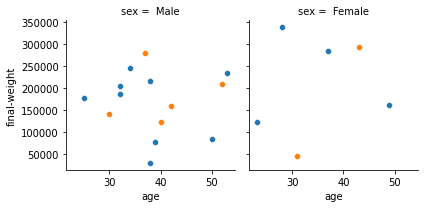

In [60]:
g = sns.FacetGrid(dataset.iloc[0:20, 0:], col= 'sex', hue="income")

g.map(sns.scatterplot, 'age', 'final-weight')

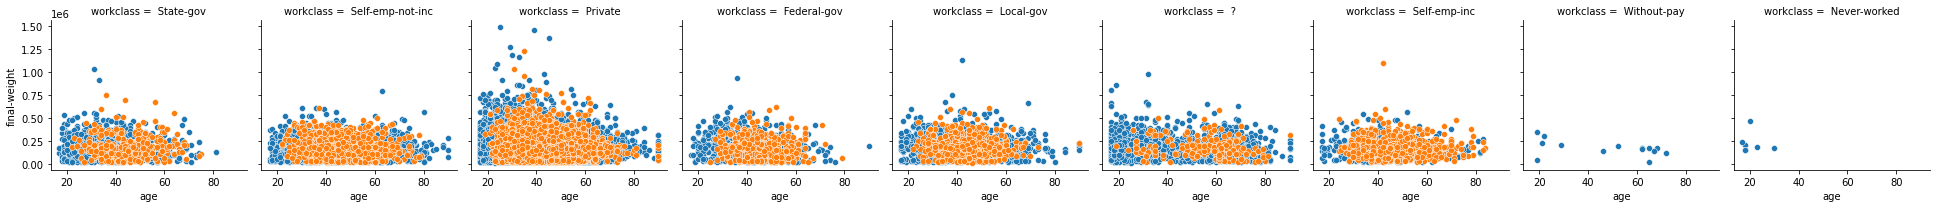

In [62]:
g = sns.FacetGrid(dataset, col= 'workclass', hue="income")

g.map(sns.scatterplot, 'age', 'final-weight')

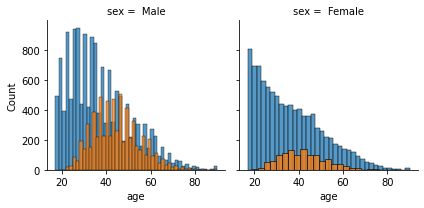

In [63]:
g = sns.FacetGrid(dataset, col="sex", hue="income")
g.map(sns.histplot, 'age')

In [64]:
dataset2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


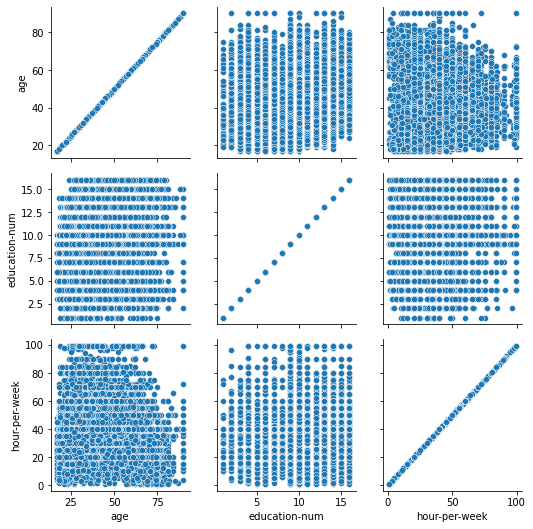

In [66]:
g = sns.PairGrid(dataset2)
g.map(sns.scatterplot)

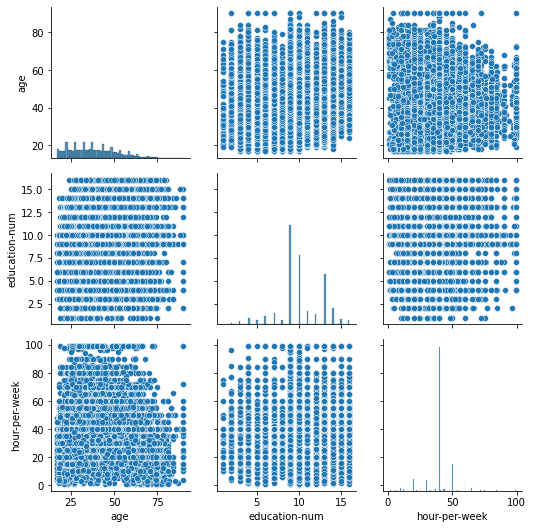

In [67]:
g = sns.PairGrid(dataset2)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [68]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     |████████████████████████████████| 133.1 MB 24 kB/s 
     |████████████████████████████████| 6.3 MB 6.7 MB/s 
     |████████████████████████████████| 219 kB 65.8 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759597 sha256=f97c4015f6b955b00ee0ba12fae6bd545882ab9744fc491014ec1fcd15517112
  Stored in directory: /tmp/pip-ephem-wheel-cache-hoku22yh/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: 

In [1]:
from mpl_toolkits.basemap import Basemap

In [4]:
dataset = pd.read_csv('house_prices.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
dataset = dataset.sort_values(by = 'price', ascending = True)
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250


In [6]:
dataset.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [7]:
dataset_caros = dataset[0:1000]
dataset_caros

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19285,844001145,20150326T000000,208500.0,2,1.00,880,4814,1.0,0,0,4,5,880,0,1906,0,98010,47.3107,-121.999,1010,6160
303,5104530560,20150401T000000,208633.0,3,2.50,2040,3810,2.0,0,0,3,8,2040,0,2006,0,98038,47.3537,-122.000,2370,4590
20819,3336500140,20140919T000000,208800.0,3,2.50,1390,2450,2.0,0,0,3,7,1390,0,2009,0,98118,47.5298,-122.269,1390,2450
13595,425000175,20141013T000000,208950.0,3,1.00,960,5700,1.0,0,0,4,5,960,0,1956,0,98056,47.4983,-122.172,960,5700


In [8]:
dataset_baratos = dataset[0:1000]
dataset_baratos

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19285,844001145,20150326T000000,208500.0,2,1.00,880,4814,1.0,0,0,4,5,880,0,1906,0,98010,47.3107,-121.999,1010,6160
303,5104530560,20150401T000000,208633.0,3,2.50,2040,3810,2.0,0,0,3,8,2040,0,2006,0,98038,47.3537,-122.000,2370,4590
20819,3336500140,20140919T000000,208800.0,3,2.50,1390,2450,2.0,0,0,3,7,1390,0,2009,0,98118,47.5298,-122.269,1390,2450
13595,425000175,20141013T000000,208950.0,3,1.00,960,5700,1.0,0,0,4,5,960,0,1956,0,98056,47.4983,-122.172,960,5700


In [9]:
dataset['lat'].describe()

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [10]:
dataset['long'].describe()

count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [11]:
lat1, lat2 = dataset['lat'].min(), dataset['lat'].max()
lon1, lon2 = dataset['long'].min(), dataset['long'].max()

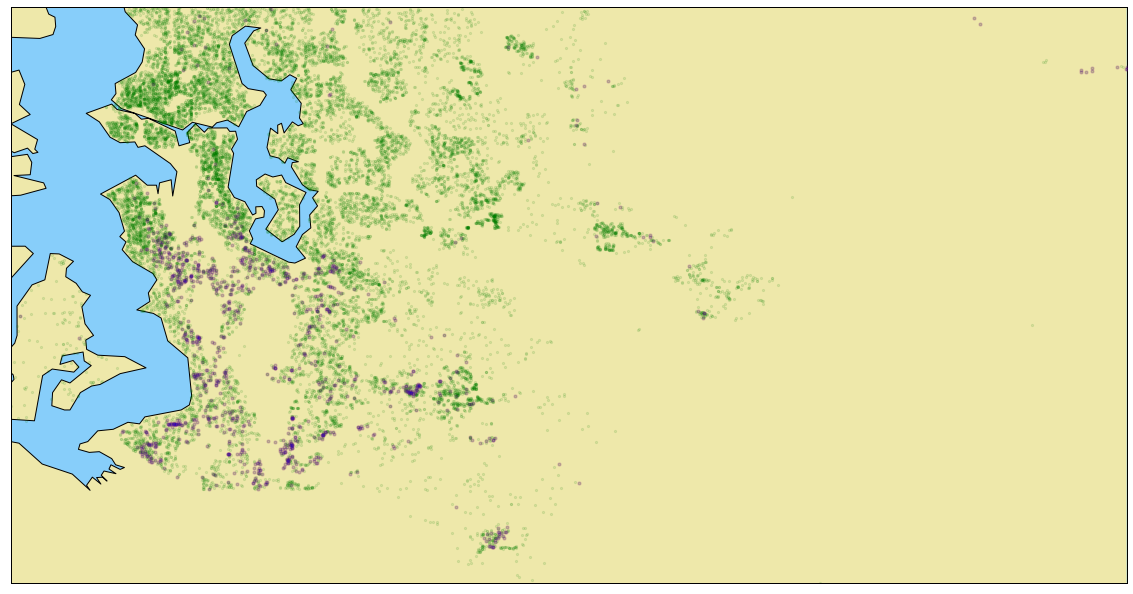

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat = lat1, urcrnrlat = lat2,
            llcrnrlon = lon1, urcrnrlon = lon2)
m.drawcoastlines()
m.fillcontinents(color = 'palegoldenrod', lake_color='lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')
m.scatter(dataset['long'], dataset['lat'], s = 5, c = 'green', alpha = 0.1, zorder = 2)
m.scatter(dataset_caros['long'], dataset_caros['lat'], s = 10, c = 'red', alpha = 0.1, zorder = 3)
m.scatter(dataset_baratos['long'], dataset_baratos['lat'], s = 10, c = 'blue', alpha = 0.1, zorder = 4)

# Exercícico